In [1]:
#import all required libraries

import copy
import numpy as np
import math
import glob
import cv2
import matplotlib.pyplot as plt
import json
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import cross_val_predict
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.datasets import mnist
import tensorflow as tf

In [2]:
#check that files are in correct place

first_dir = glob.glob("./stare-images/*.ppm")
second_dir = glob.glob("./labels-ah/*.ppm")

print(first_dir)
print(second_dir)

['./stare-images\\im0001.ppm', './stare-images\\im0002.ppm', './stare-images\\im0003.ppm', './stare-images\\im0004.ppm', './stare-images\\im0005.ppm', './stare-images\\im0044.ppm', './stare-images\\im0077.ppm', './stare-images\\im0081.ppm', './stare-images\\im0082.ppm', './stare-images\\im0139.ppm', './stare-images\\im0162.ppm', './stare-images\\im0163.ppm', './stare-images\\im0235.ppm', './stare-images\\im0236.ppm', './stare-images\\im0239.ppm', './stare-images\\im0240.ppm', './stare-images\\im0255.ppm', './stare-images\\im0291.ppm', './stare-images\\im0319.ppm', './stare-images\\im0324.ppm']
['./labels-ah\\im0001.ah.ppm', './labels-ah\\im0002.ah.ppm', './labels-ah\\im0003.ah.ppm', './labels-ah\\im0004.ah.ppm', './labels-ah\\im0005.ah.ppm', './labels-ah\\im0044.ah.ppm', './labels-ah\\im0077.ah.ppm', './labels-ah\\im0081.ah.ppm', './labels-ah\\im0082.ah.ppm', './labels-ah\\im0139.ah.ppm', './labels-ah\\im0162.ah.ppm', './labels-ah\\im0163.ah.ppm', './labels-ah\\im0235.ah.ppm', './label

In [3]:
#list all the images

eye_images = []
blood_vessels_images = []
rows = 4
columns = 4

for filename in first_dir:
    eye_images.append(cv2.imread(filename))
    
for filename in second_dir:
    blood_vessels_images.append(cv2.imread(filename))

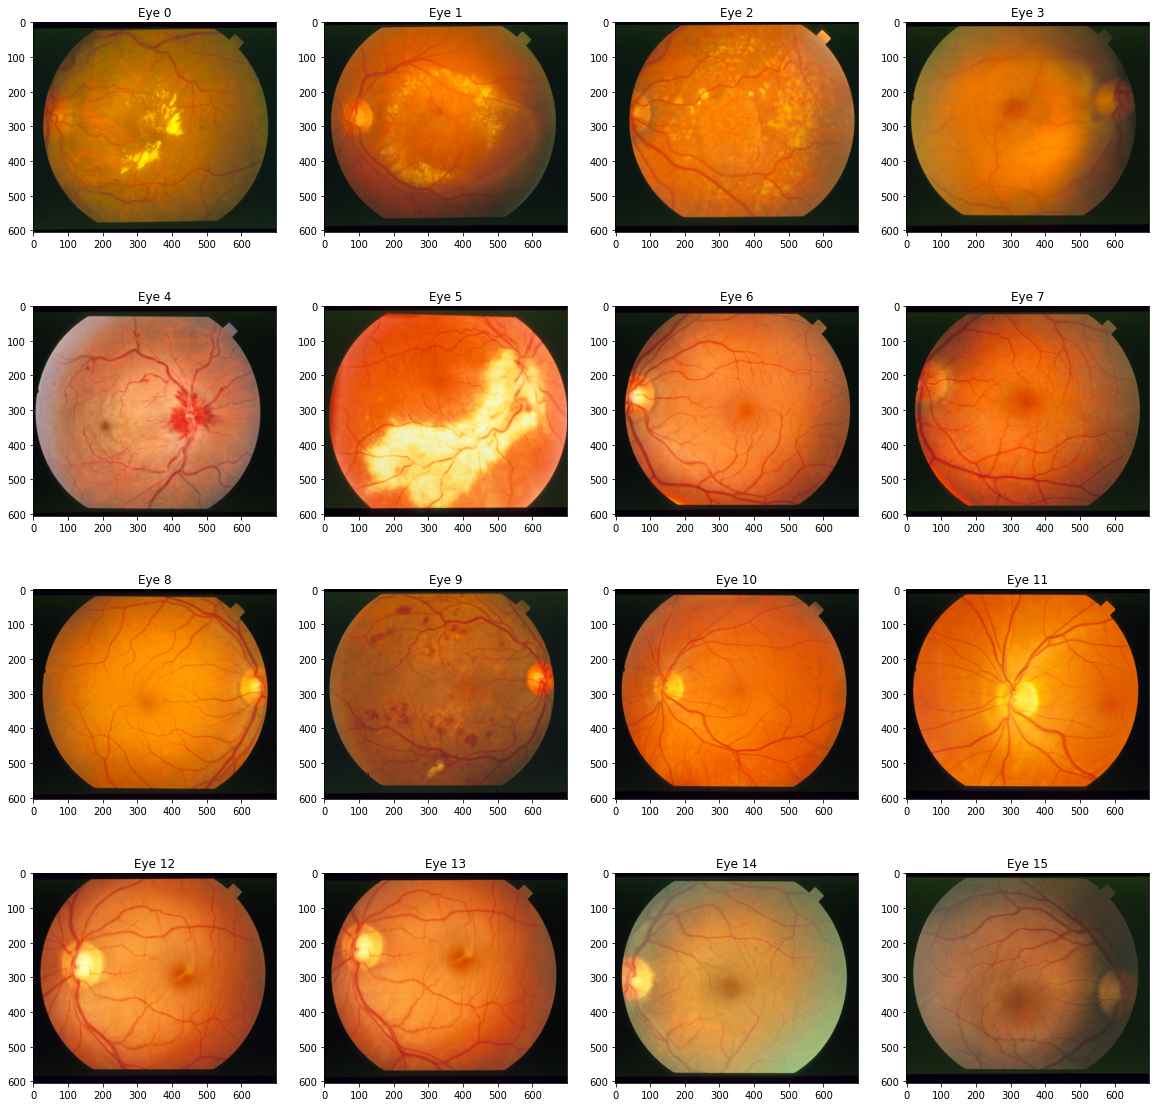

In [4]:
# draw images

fig = plt.figure(figsize=(20, 20))

for i in range(rows*columns):
    fig.add_subplot(rows, columns, i+1)
    image = eye_images[i]
    plt.title("Eye %d" %i)
    plt.imshow(image[:,:,::-1])

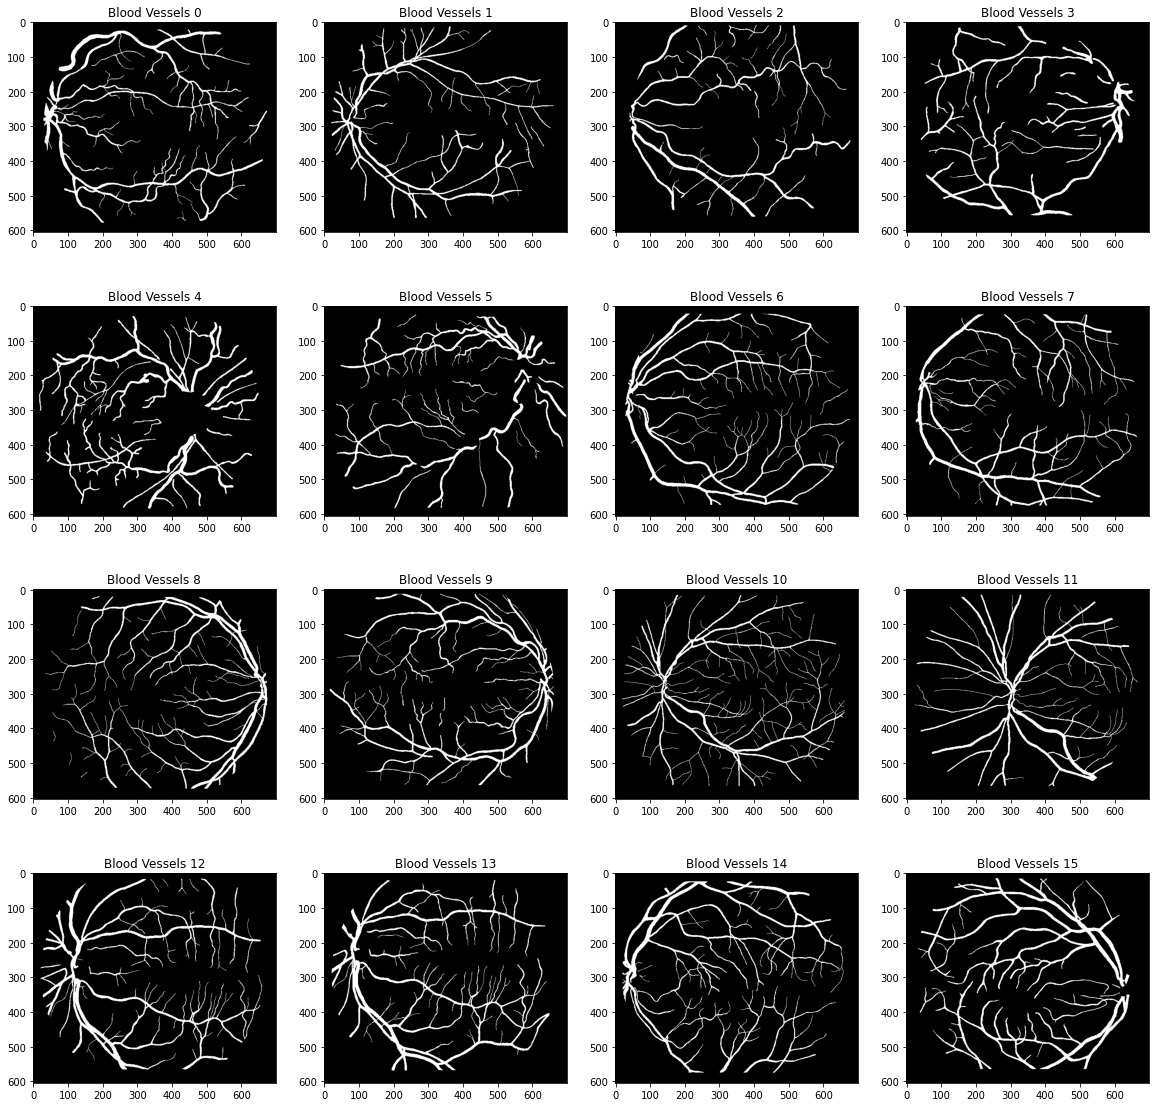

In [5]:
# draw images

fig2 = plt.figure(figsize=(20, 20))

for i in range(rows*columns):
    fig2.add_subplot(rows, columns, i+1)
    image = blood_vessels_images[i]
    plt.title("Blood Vessels %d" %i)
    plt.imshow(image)

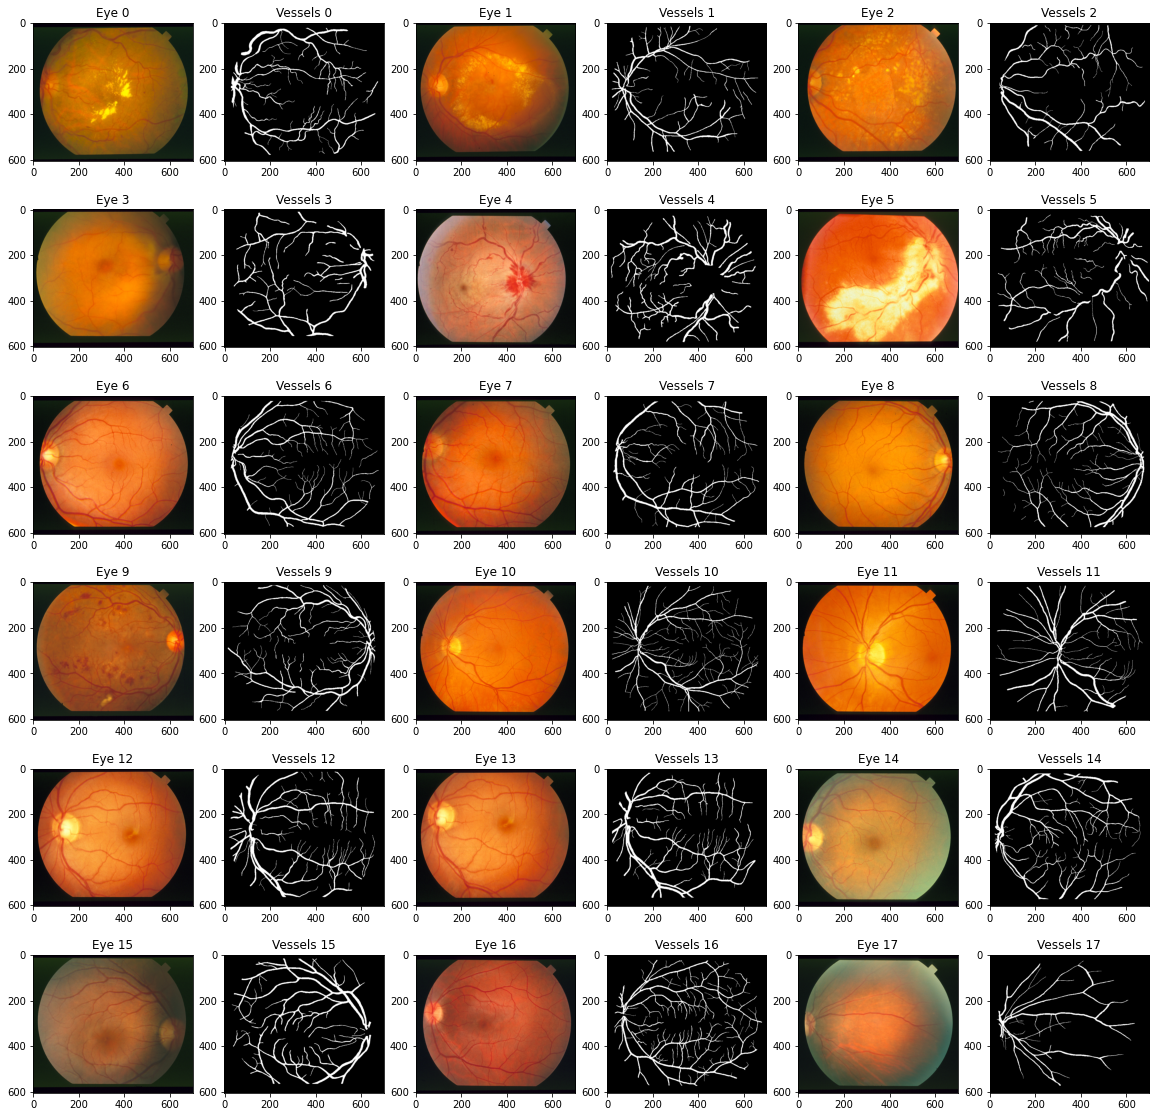

In [6]:
#comparison of eyes and vessels

rows = 6
cols = 6

fig3 = plt.figure(figsize=(20, 20))

for i in range(0, cols*rows):
    fig3.add_subplot(rows, cols, i+1)
    if (i+1)%2:
        img = eye_images[int(i/2)]
        plt.title("Eye %d" % int(i/2))
        plt.imshow(img[:,:,::-1])
    else:
        img = blood_vessels_images[int(i/2)]
        plt.title("Vessels %d" % int(i/2))
        plt.imshow(img)

Text(0.5, 1.0, 'Blue Channel')

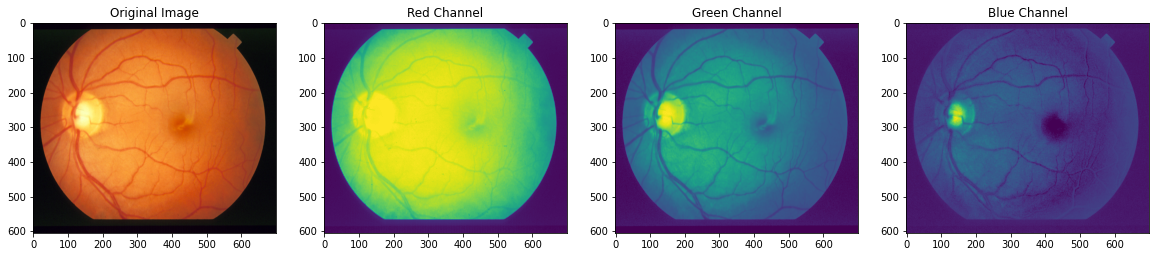

In [7]:
main_image = eye_images[12]

plt.figure(figsize=(20,12))
plt.subplot(141)

plt.imshow(main_image[:,:,::-1])
plt.title("Original Image")
plt.subplot(142)

red_image = main_image[:,:,2]
plt.imshow(red_image)
plt.title("Red Channel")
plt.subplot(143)

green_image = main_image[:,:,1]
plt.imshow(green_image)
plt.title("Green Channel")
plt.subplot(144)

blue_image = main_image[:,:,0]
plt.imshow(blue_image)
plt.title("Blue Channel")


Text(0.5, 1.0, 'Blue Channel-gray')

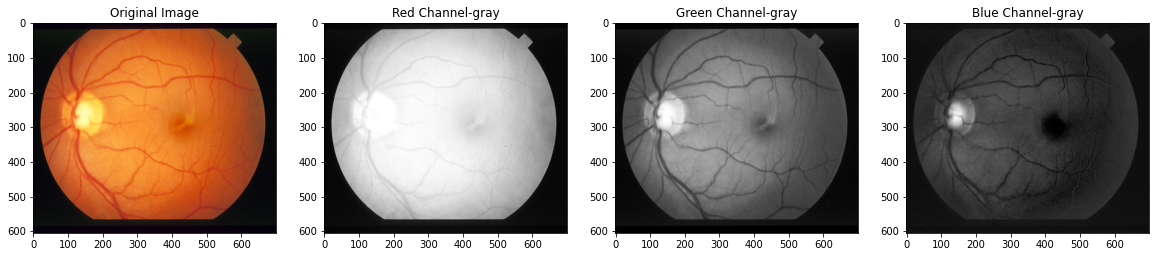

In [8]:
plt.figure(figsize=(20,12))
plt.subplot(141)

plt.imshow(main_image[:,:,::-1])
plt.title("Original Image")
plt.subplot(142)

red_image_gray = main_image[:,:,2]
plt.imshow(red_image_gray, cmap="gray")
plt.title("Red Channel-gray")
plt.subplot(143)

green_image_gray = main_image[:,:,1]
plt.imshow(green_image_gray, cmap="gray")
plt.title("Green Channel-gray")
plt.subplot(144)

blue_image_gray = main_image[:,:,0]
plt.imshow(blue_image_gray, cmap="gray")
plt.title("Blue Channel-gray")

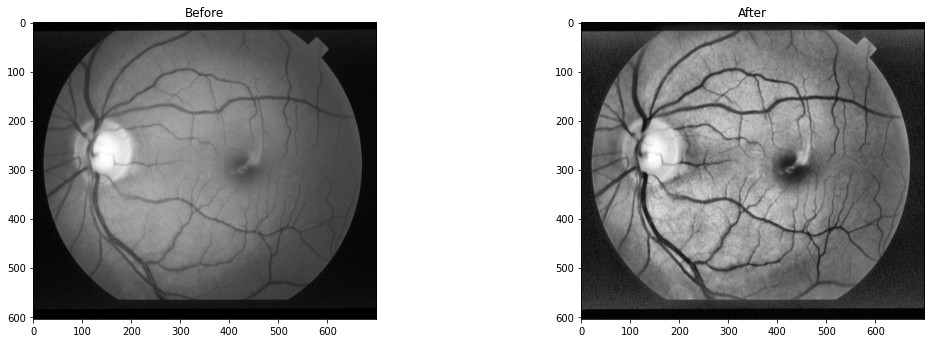

In [9]:
#Contrast Limited Adaptive Histogram Equalization

clahe = cv2.createCLAHE(clipLimit=3)
green_image_equalized = clahe.apply(green_image)

fig=plt.figure(figsize=(18, 12))
plt.subplot(221)
plt.imshow(green_image, cmap='gray')
plt.title("Before")
plt.subplot(222)
plt.imshow(green_image_equalized, cmap='gray')
plt.title("After")

plt.show()
#Z tego poniżej będziemy wycinali kawałki

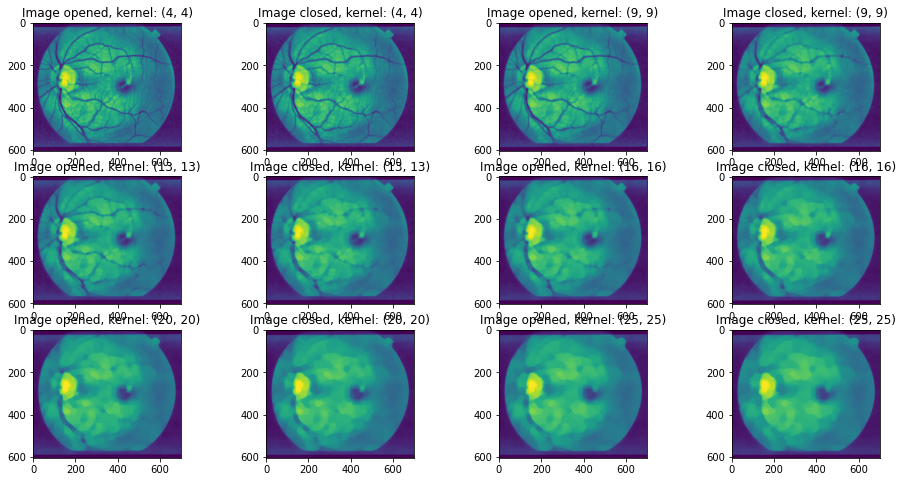

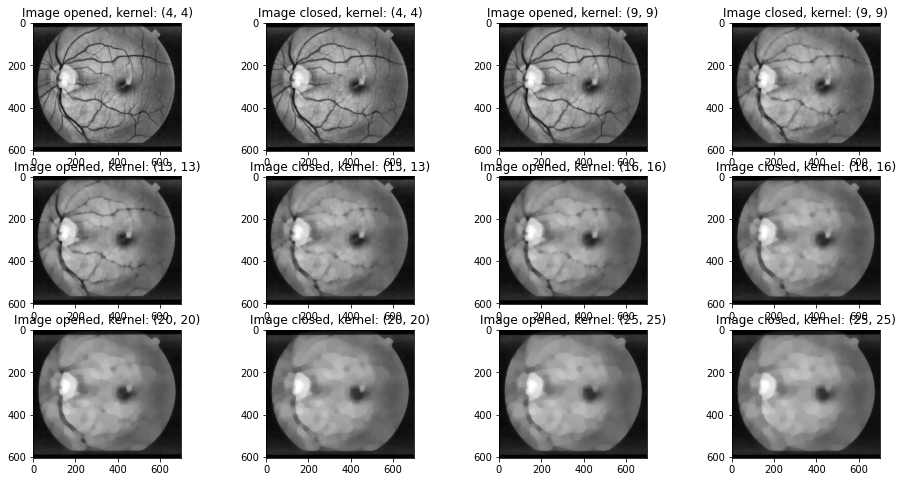

In [10]:
#extracting the background

fig=plt.figure(figsize=(16, 8))
rows = 3
columns = 4

kernel_sizes = [4,9,13,16,20,25]
kernels = []
for item in kernel_sizes:
    kernels.append(cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(item, item)))

clahe = cv2.createCLAHE(clipLimit=3)
morphology_steps = [clahe.apply(green_image)]

for kernel in kernels:
    image_opened = cv2.morphologyEx(morphology_steps[-1], cv2.MORPH_OPEN, kernel, iterations = 1)
    image_closed = cv2.morphologyEx(image_opened, cv2.MORPH_CLOSE, kernel, iterations = 1)
    morphology_steps.extend([image_opened, image_closed])

for i in range(1, len(morphology_steps)):
    image = morphology_steps[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(image)
    kernel_size = kernel_sizes[math.ceil(i/2)-1]
    if i%2==1:
        plt.title("Image opened, kernel: (%d, %d)" % (kernel_size, kernel_size))
    else:
        plt.title("Image closed, kernel: (%d, %d)" % (kernel_size, kernel_size))

fig2 = plt.figure(figsize=(16, 8))

for i in range(1, len(morphology_steps)):
    image = morphology_steps[i]
    fig2.add_subplot(rows, columns, i)
    plt.imshow(image, cmap="gray")
    kernel_size = kernel_sizes[math.ceil(i/2)-1]
    if i%2==1:
        plt.title("Image opened, kernel: (%d, %d)" % (kernel_size, kernel_size))
    else:
        plt.title("Image closed, kernel: (%d, %d)" % (kernel_size, kernel_size))
    

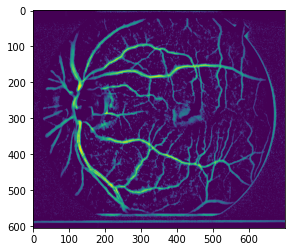

In [11]:
#we subtract the background from the vessels

vessels = cv2.subtract(morphology_steps[-1], green_image_equalized)
vessels_equalized = clahe.apply(vessels)
plt.imshow(vessels_equalized)

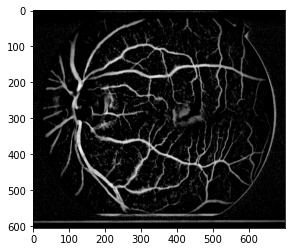

In [12]:
#gray

plt.imshow(vessels_equalized, cmap="gray")

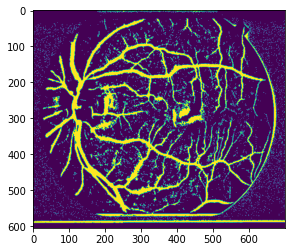

In [13]:
#threshold the vessels

_, vessels_equalized_threshold = cv2.threshold(vessels_equalized, 30, 1024, cv2.THRESH_BINARY)
plt.imshow(vessels_equalized_threshold)

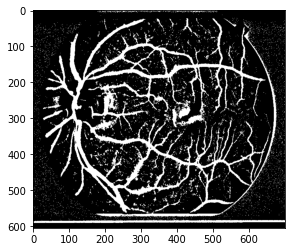

In [14]:
#gray

plt.imshow(vessels_equalized_threshold, cmap="gray")

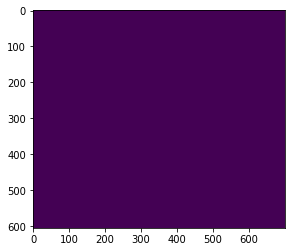

In [15]:
#create mask to remove noise

noise_mask = np.ones(vessels_equalized.shape[:2], dtype="uint8") * 255
plt.imshow(noise_mask)

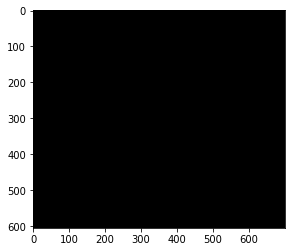

In [16]:
#gray
plt.imshow(noise_mask, cmap="gray")

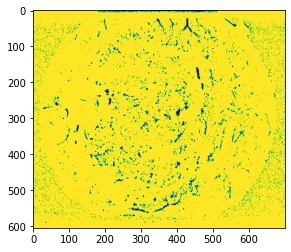

In [17]:
#Draw the contours, which we want to remove

contours, _ = cv2.findContours(vessels_equalized_threshold.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    if cv2.contourArea(contour) <= 300:
        cv2.drawContours(noise_mask, [contour], -1, 0, -1)
plt.imshow(noise_mask)

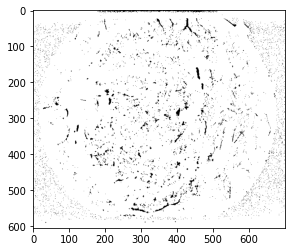

In [18]:
plt.imshow(noise_mask, cmap="gray")

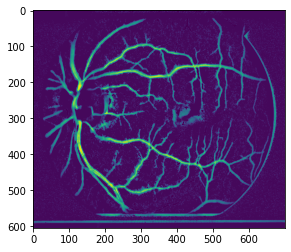

In [19]:
#put a mask on the vessels

vessels_corrected = cv2.bitwise_and(vessels_equalized, vessels_equalized, mask=noise_mask)
plt.imshow(vessels_corrected)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

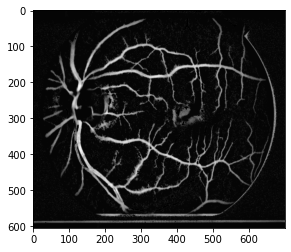

In [20]:
#gray

plt.imshow(vessels_corrected, cmap='gray')
print(vessels_corrected[20])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


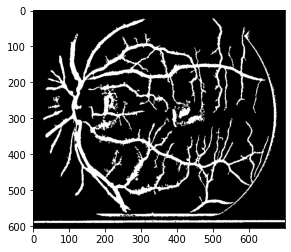

In [21]:
new_vessels = copy.copy(vessels_corrected)

for i in range(len(vessels_corrected)):
    for j in range(len(vessels_corrected[i])):
        if vessels_corrected[i][j] > 30:
            new_vessels[i][j]=1
        else:
            new_vessels[i][j]=0
print(new_vessels)
plt.imshow(new_vessels, cmap='gray')

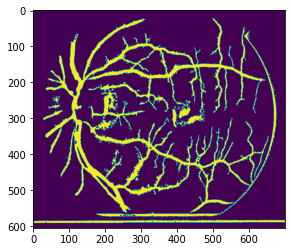

In [22]:
#threshold again

_, vessels_corrected_thresholded = cv2.threshold(vessels_corrected, 30, 1024, cv2.THRESH_BINARY)
plt.imshow(vessels_corrected_thresholded)

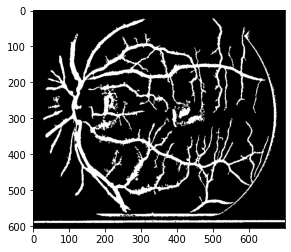

In [23]:
plt.imshow(vessels_corrected_thresholded, cmap="gray")

In [24]:
def extract_to_knn(image):
    clahe = cv2.createCLAHE(clipLimit=3)
    green_image_equalized = image[:,:,1]
    green_image_equalized = clahe.apply(green_image_equalized)
    return green_image_equalized

def extract_vessels(image, kernel_sizes = [5,7,15,21], threshold=20, max_noise_area=200):
    clahe = cv2.createCLAHE(clipLimit=3)
    green_image_equalized = image[:,:,1]
    green_image_equalized = clahe.apply(green_image_equalized)
    
    kernels = [cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(size, size)) for size in kernel_sizes]

    morphology_steps = [green_image_equalized.copy()]
    
    for kernel in kernels:
        image_opened = cv2.morphologyEx(morphology_steps[-1], cv2.MORPH_OPEN, kernel, iterations = 1)
        image_closed = cv2.morphologyEx(image_opened, cv2.MORPH_CLOSE, kernel, iterations = 1)
        morphology_steps.extend([image_opened, image_closed])

    extracted_vessels = cv2.subtract(morphology_steps[-1], green_image_equalized)
    extracted_vessels_equalized = clahe.apply(extracted_vessels)
    _, extracted_vessels_equalized_threshold = cv2.threshold(extracted_vessels_equalized,threshold,255,cv2.THRESH_BINARY)
    
    noise_mask = np.ones(extracted_vessels_equalized_threshold.shape[:2], dtype="uint8") * 255

    contours, hierarchy = cv2.findContours(extracted_vessels_equalized_threshold.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        if cv2.contourArea(contour) <= max_noise_area:
            cv2.drawContours(noise_mask, [contour], -1, 0, -1)

    extracted_vessels_corrected = cv2.bitwise_and(extracted_vessels_equalized, extracted_vessels_equalized, mask=noise_mask)
    _, extracted_vessels_corrected_thresholded = cv2.threshold(extracted_vessels_corrected, threshold, 255, cv2.THRESH_BINARY)
    return extracted_vessels_corrected_thresholded

In [25]:
results = [extract_vessels(image) for image in eye_images]
results_knn = [extract_to_knn(image) for image in eye_images]

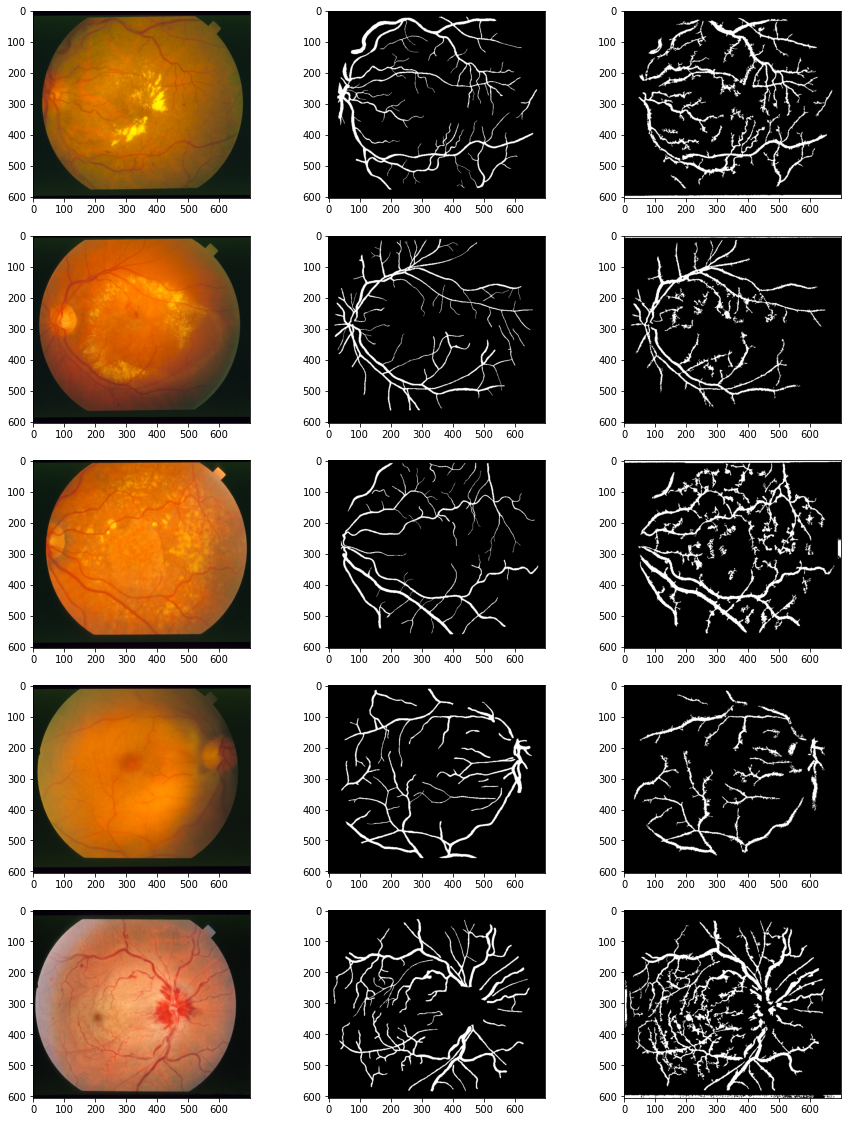

In [26]:
fig=plt.figure(figsize=(15, 20))

columns = 3
rows = 5

for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    if i%3==0:
        img = eye_images[int(i/3)]
        plt.imshow(img[:,:,::-1])
    elif i%3==1:
        img = blood_vessels_images[int(i/3)]
        plt.imshow(img)
    else:
        img = results[int(i/3)]
        plt.imshow(img, cmap='gray')
plt.show()

In [27]:
def make_confusion_matrix(actual, predicted):
    TP=0
    FN=0
    FP=0
    TN=0
    P=0
    N=0
    for i in range(len(actual)):
        for j in range(len(actual[i])):
            
            if sum(actual[i][j])==0 and predicted[i][j]==0:
                TN += 1
                N +=1
            if sum(actual[i][j])==0 and predicted[i][j]>0.1:
                FP += 1
                N += 1
            if sum(actual[i][j])>0.1 and predicted[i][j]==0:
                FN +=1 
                P += 1
            if sum(actual[i][j])>0.1 and predicted[i][j]>0.1:
                TP += 1
                P +=1
    return { "TP": TP, "FN": FN, "FP": FP, "TN": TN, "P": P, "N": N, "TPR": TP/P, "TNR": TN/N, "PPV": TP/(TP+FP), "ACC": (TP+TN)/(P+N) }

            

In [28]:
confusion_matrix=[make_confusion_matrix(blood_vessels_images[i], results[i]) for i in range(len(results))]
confusion_matrix_ip=[]
for key in confusion_matrix[0]:
    tmp = sum(x[key] for x in confusion_matrix)/len(confusion_matrix)
    confusion_matrix_ip.append(tmp)
    print(f"avg({key}) = {tmp}")


avg(TP) = 26391.25
avg(FN) = 5811.4
avg(FP) = 21813.4
avg(TN) = 369483.95
avg(P) = 32202.65
avg(N) = 391297.35
avg(TPR) = 0.8145801907561452
avg(TNR) = 0.9442010402412198
avg(PPV) = 0.5575712255056239
avg(ACC) = 0.9347702479338842


In [29]:
def cut_image(img, size):
        return [img[i:i+size, j:j+size] for i in range(0,len(img)-size,1) for j in range(0,len(img[i])-size,1)]
def get_label(img, size):
        return [int(sum(img[i+size//2][j+size//2])/765)  for i in range(0,len(img)-size,1) for j in range(0,len(img[i])-size,1) ]
def change_dim(X):
        tmp=[]
        for x in X:
                for item in x:
                        tmp.append(item)
        return tmp
    

In [30]:
def get_param(x):
    x= np.array(x)
    moments = cv2.moments(x)
    huMoments = cv2.HuMoments(moments)
    variance = np.var(x)
    this_fragment = [
    moments['mu20'],
    moments['mu11'],
    moments['mu02'],
    moments['mu30'],
    moments['mu21'],
    moments['mu12'], 
    #moments['mu03'],
    huMoments[0][0],
    huMoments[1][0],
    huMoments[2][0],
    huMoments[3][0],
    huMoments[4][0],
    huMoments[5][0],
    huMoments[6][0],
    variance]
    return this_fragment

X = cut_image(results_knn[0], 5)+cut_image(results_knn[1], 5)
Y = get_label(blood_vessels_images[0], 5)+get_label(blood_vessels_images[1],5)
X_test = cut_image(results_knn[3], 5)
y_test = get_label(blood_vessels_images[3], 5)
X_test =[get_param(x) for x in X_test]
X = [change_dim(x) for x in X]
new_X = []
for x in X:
    x= np.array(x)
    moments = cv2.moments(x)
    huMoments = cv2.HuMoments(moments)
    variance = np.var(x)
    this_fragment = [
    moments['mu20'],
    moments['mu11'],
    moments['mu02'],
    moments['mu30'],
    moments['mu21'],
    moments['mu12'], 
    #moments['mu03'],
    huMoments[0][0],
    huMoments[1][0],
    huMoments[2][0],
    huMoments[3][0],
    huMoments[4][0],
    huMoments[5][0],
    huMoments[6][0],
    variance]
    new_X.append(this_fragment)




In [31]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [32]:
neigh.fit(new_X,Y)

KNeighborsClassifier(n_neighbors=1)

In [33]:
def knn(img):
    new_img = np.zeros((605,700))
    for i in range(new_img.shape[0]):
        for j in range(new_img.shape[1]):
            if i <2 or i > 602:
                new_img[i][j]=0
            elif j<2 or j > 696:
                new_img[i][j]=0
            else:
                data_to_predict = img[i: i+5, j: j+5]
                data_to_predict = get_param(change_dim(data_to_predict))
                new_img[i+2][j+2]=neigh.predict([data_to_predict])[0]
    return new_img

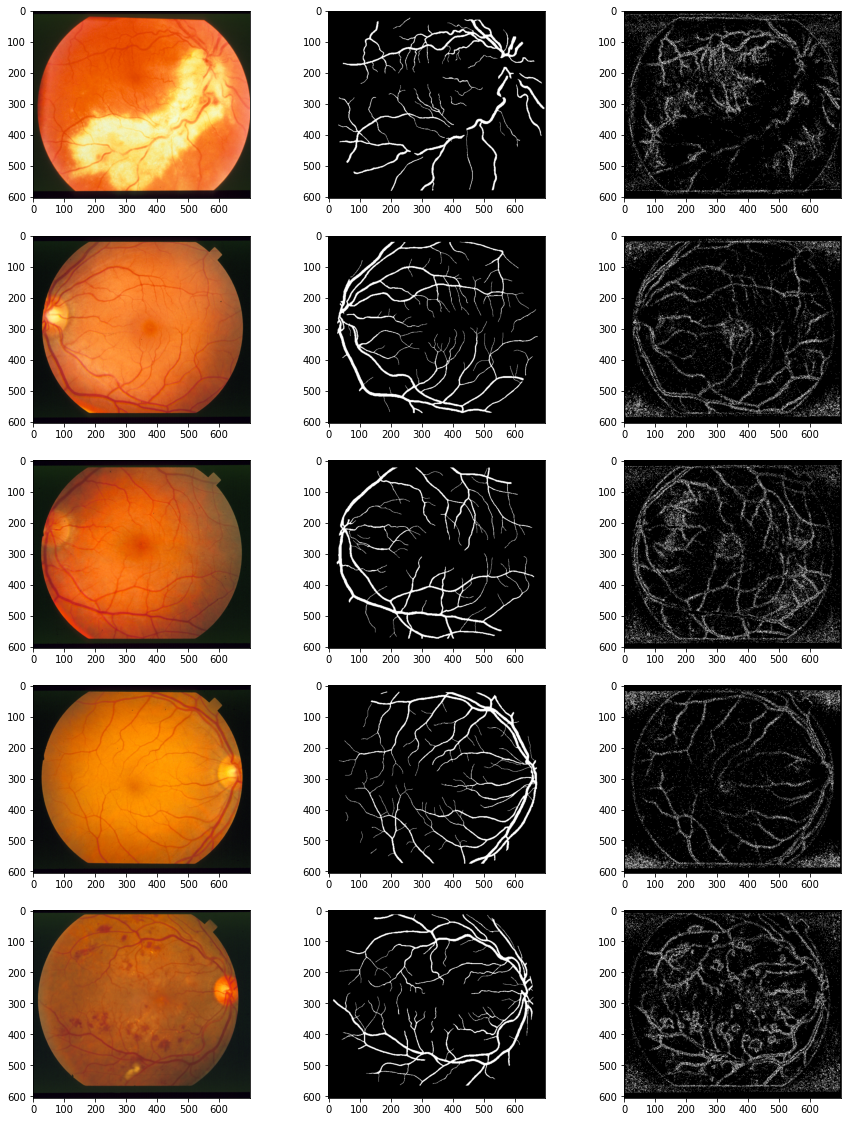

In [34]:
fig=plt.figure(figsize=(15, 20))
conf_matrix =[]
columns = 3
rows = 5
img_index=[5,6,7,8,9]
for i in range(0,columns*rows):
    fig.add_subplot(rows, columns, i+1)
    if i%3==0:
        img = eye_images[img_index[int(i/3)]]
        plt.imshow(img[:,:,::-1])
    elif i%3==1:
        img = blood_vessels_images[img_index[int(i/3)]]
        plt.imshow(img)
    else:
        img = knn(results_knn[img_index[int(i/3)]])
        conf_matrix.append(make_confusion_matrix(blood_vessels_images[img_index[int(i/3)]], img))
        plt.imshow(img, cmap='gray')
plt.show()

In [35]:
avg_conf_matrix_knn=[]
keys=[]
for key in conf_matrix[0]:
    tmp = sum(x[key] for x in conf_matrix)/len(conf_matrix)
    avg_conf_matrix_knn.append(tmp)
    keys.append(key)
    print(f"avg({key}) = {tmp}")

avg(TP) = 8609.4
avg(FN) = 23874.4
avg(FP) = 24957.8
avg(TN) = 366058.4
avg(P) = 32483.8
avg(N) = 391016.2
avg(TPR) = 0.2647819867456044
avg(TNR) = 0.9361760568967525
avg(PPV) = 0.26061357714778804
avg(ACC) = 0.8846937426210154


In [36]:
for knn_, ip_, key_ in zip(avg_conf_matrix_knn, confusion_matrix_ip, keys):
    print(f"avg({key_}): knn -> {knn_},  ip -> {ip_}")


avg(TP): knn -> 8609.4,  ip -> 26391.25
avg(FN): knn -> 23874.4,  ip -> 5811.4
avg(FP): knn -> 24957.8,  ip -> 21813.4
avg(TN): knn -> 366058.4,  ip -> 369483.95
avg(P): knn -> 32483.8,  ip -> 32202.65
avg(N): knn -> 391016.2,  ip -> 391297.35
avg(TPR): knn -> 0.2647819867456044,  ip -> 0.8145801907561452
avg(TNR): knn -> 0.9361760568967525,  ip -> 0.9442010402412198
avg(PPV): knn -> 0.26061357714778804,  ip -> 0.5575712255056239
avg(ACC): knn -> 0.8846937426210154,  ip -> 0.9347702479338842
